We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [19]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
#! pip install imblearn
! pip install feature_engine
from feature_engine.discretisation import EqualWidthDiscretiser

## Load and review data

In [20]:
cData = pd.read_csv(r"C:\Users\Navnit Ashok Nair\OneDrive\Desktop\SINDy\TBC_data_study_1.csv")  
cData.shape

(153, 15)

In [21]:
cData=cData.drop(['Unnamed: 0','std_rho','std_R','RelativeDessityError','RelativeTBCError','dT'],axis=1)
cData.head()

,NSheets,WidthWater,LengthGraphene,Temperature,Pressure,ContactAngle,SurfaceTension,RelativeDensity,RelativeTBR
0,8,30,60,280,1,120,75.741886,1.487170,1.585502
1,8,30,60,300,1,130,72.935536,1.548031,1.610285
2,8,30,60,280,1,130,75.741886,1.569903,1.818463
3,8,30,60,360,1,130,63.308599,1.598603,1.569393
4,8,30,60,340,1,120,66.709466,1.599308,1.339219


In [22]:
variables = ['RelativeDensity']
disc = EqualWidthDiscretiser(bins=8, variables=variables, return_boundaries=True)
disc.fit(cData)
x1 =disc.transform(cData)


In [23]:
n=x1['RelativeDensity'].unique().tolist()
#n=n.sort()
n.sort()
n

['(-inf, 1.825]',
 '(1.825, 2.163]',
 '(2.163, 2.502]',
 '(2.502, 2.84]',
 '(2.84, 3.178]',
 '(3.178, 3.516]',
 '(3.516, 3.854]',
 '(3.854, inf]']

TRAINING : DEGREE TWO _ (-inf, 1.825] _ 0.9827765980868044
TEST : DEGREE TWO _  (-inf, 1.825] _ 0.7962650006171724


C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_8660\2167690463.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_8660\2167690463.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_8660\2167690463.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_8660\2167690463.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame 

TRAINING : DEGREE TWO _ (1.825, 2.163] _ 0.9430322585576832
TEST : DEGREE TWO _  (1.825, 2.163] _ 0.8139567206205603
TRAINING : DEGREE TWO _ (2.163, 2.502] _ 0.8986613344580398
TEST : DEGREE TWO _  (2.163, 2.502] _ 0.627598643561683
TRAINING : DEGREE TWO _ (2.502, 2.84] _ 0.9487865970256024
TEST : DEGREE TWO _  (2.502, 2.84] _ -9.737736881975927
TRAINING : DEGREE TWO _ (2.84, 3.178] _ 0.96
TEST : DEGREE TWO _  (2.84, 3.178] _ nan
TRAINING : DEGREE TWO _ (3.178, 3.516] _ 0.9795918367346937
TEST : DEGREE TWO _  (3.178, 3.516] _ nan
TRAINING : DEGREE TWO _ (3.516, 3.854] _ 0.9600000000000064
TEST : DEGREE TWO _  (3.516, 3.854] _ nan
TRAINING : DEGREE TWO _ (3.854, inf] _ nan
TEST : DEGREE TWO _  (3.854, inf] _ nan
                   1   NSheets  WidthWater  LengthGraphene  Temperature  \
RelativeDensity                                                           
(-inf, 1.825]    0.0 -0.074724    0.000000       -0.022084    -0.061747   
(1.825, 2.163]   0.0 -0.162392   -0.005861       -0.02

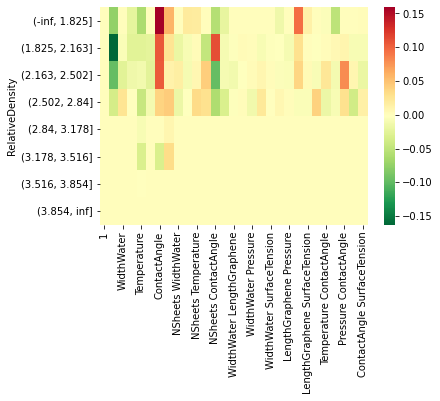

In [24]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
df_frame = pd.DataFrame()
for i in n:
    cData1=x1[x1['RelativeDensity']==i]
    X = cData1.drop(['RelativeTBR','RelativeDensity'], axis=1)
    y = cData1[['RelativeTBR']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    
    
    # created scaler
    scaler = StandardScaler()
    # fit scaler on training dataset
    scaler.fit(X_train)
    # transform training dataset
    X_train = scaler.transform(X_train)
    # transform test dataset
    X_test = scaler.transform(X_test)
    
    
    poly = PolynomialFeatures(degree=2, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    

    poly_clf = linear_model.Ridge()
    poly_clf.fit(X_train2, y_train)
    y_pred2 = poly_clf.predict(X_test2)
    print("TRAINING : DEGREE TWO _",i,"_",poly_clf.score(X_train2, y_train))
    print("TEST : DEGREE TWO _ ",i,"_", poly_clf.score(X_test2, y_test))

   

    features = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names_out(X.columns))
   # print(i,"____\n",features,"\n---------------------")
    
    lreg_coefficient = pd.DataFrame()
    lreg_coefficient["Columns"] = features.columns
    lreg_coefficient['Coefficient Estimate'] = pd.Series(poly_clf.coef_.flatten())
    lreg_coefficient = lreg_coefficient.set_index('Columns').T
    lreg_coefficient["RelativeDensity"] = i

    #print("Degree 2 Coefficients", lreg_coefficient)
    if (i==2):
        df_frame = lreg_coefficient.copy()
    else:
        df_frame = df_frame.append(lreg_coefficient)

    
df_frame = df_frame.rename_axis(None, axis="columns")
df_frame.reset_index(drop=True, inplace=True)
df_frame = df_frame.set_index('RelativeDensity')
print(df_frame)
sns.heatmap(df_frame, cmap='RdYlGn_r')
plt.show()


    

    
        